# 0. Imports

In [1]:
import os
import random
from types import SimpleNamespace

import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timm
import torch
import torch.nn as nn
from albumentations.pytorch import ToTensorV2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# 1. Step 1: Prepare and Explore Data

In [2]:
root_dir = "../data/lions_cheetahs_images/"  # Insert your data here
sub_folders = ["Cheetahs", "Lions"]  # Insert your classes here
labels = [0, 1]

In [3]:
data = []

for s, l in zip(sub_folders, labels):
    for r, d, f in os.walk(root_dir + s):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s, file), l))

In [4]:
df = pd.DataFrame(data, columns=["file_name", "label"])

In [5]:
df

,file_name,label
0,Cheetahs\00bb45a8568a3474.jpg,0
1,Cheetahs\00d9eb862ba3dfc6.jpg,0
2,Cheetahs\012f5ecbf49e1da0.jpg,0
3,Cheetahs\01750ba1a197e3ad.jpg,0
4,Cheetahs\029b39c0b65ebeb3.jpg,0
...,...,...
137,Lions\e8c4adb3a073997c.jpg,1
138,Lions\eab5a653e7bc2c95.jpg,1
139,Lions\eb226814a3585764.jpg,1
140,Lions\eb551b1c169fe188.jpg,1


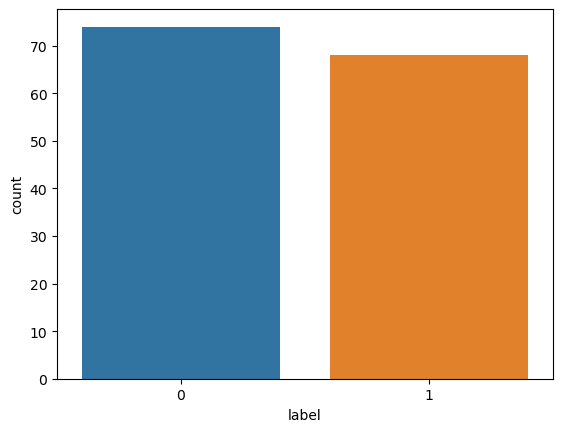

In [6]:
sns.countplot(data=df, x="label");

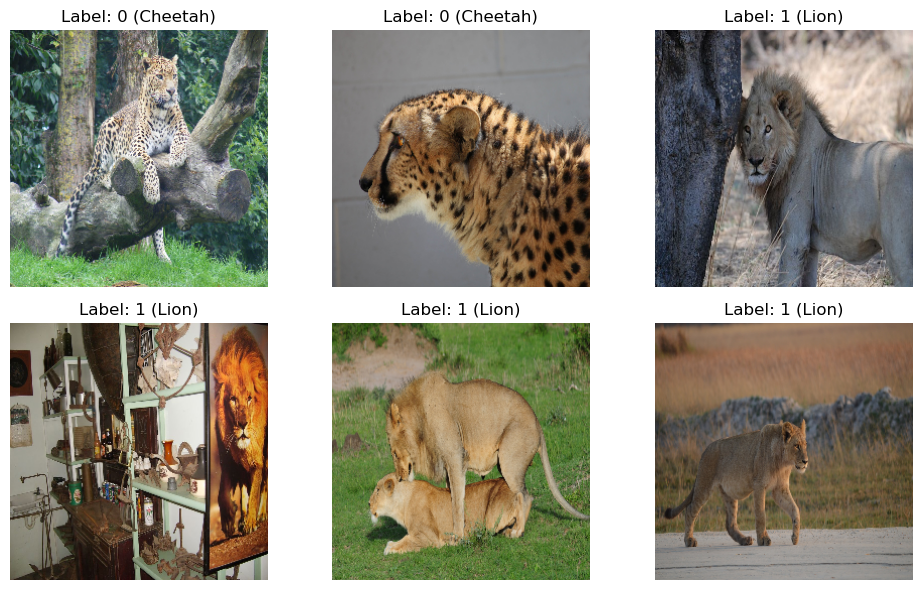

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

idx = 72
for i in range(2):
    for j in range(3):
        label = df.label[idx]
        file_path = os.path.join(root_dir, df.file_name[idx])

        # Read an image with OpenCV
        image = cv2.imread(file_path)

        # Convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize image
        image = cv2.resize(image, (256, 256))

        ax[i, j].imshow(image)
        ax[i, j].set_title(f"Label: {label} ({'Lion' if label == 1 else 'Cheetah'})")
        ax[i, j].axis("off")
        idx = idx + 1

plt.tight_layout()
plt.show()